# Batch Gradient Descent: Scikit-Learn Implementation vs Scratch Implementation:

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
df= pd.read_csv('co2.csv')

In [189]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [190]:
df.shape

(7385, 12)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [192]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [193]:
categorical_col= ['Make', 'Model', 'Vehicle Class', 'Cylinders', 'Transmission', 'Fuel Type']

for column in categorical_col:
    print(f'{column}: ',df[column].nunique())

Make:  42
Model:  2053
Vehicle Class:  16
Cylinders:  8
Transmission:  27
Fuel Type:  5


Since columns: **Make** and **Model** have so many categorical values, therefore removing it from model training as it won't add much to prediction power.

In [194]:
df.drop(columns=['Make', 'Model'], inplace=True)

In [195]:
categorical_cols= ['Vehicle Class', 'Cylinders', 'Transmission', 'Fuel Type']

## Data Visualization:

C:\Users\chitr\AppData\Local\Temp\ipykernel_9540\1661610504.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CO2 Emissions(g/km)'])


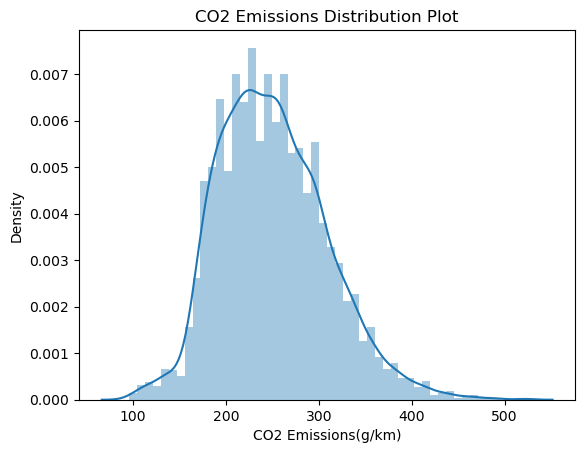

In [196]:
sns.distplot(df['CO2 Emissions(g/km)'])
plt.title('CO2 Emissions Distribution Plot')
plt.show()

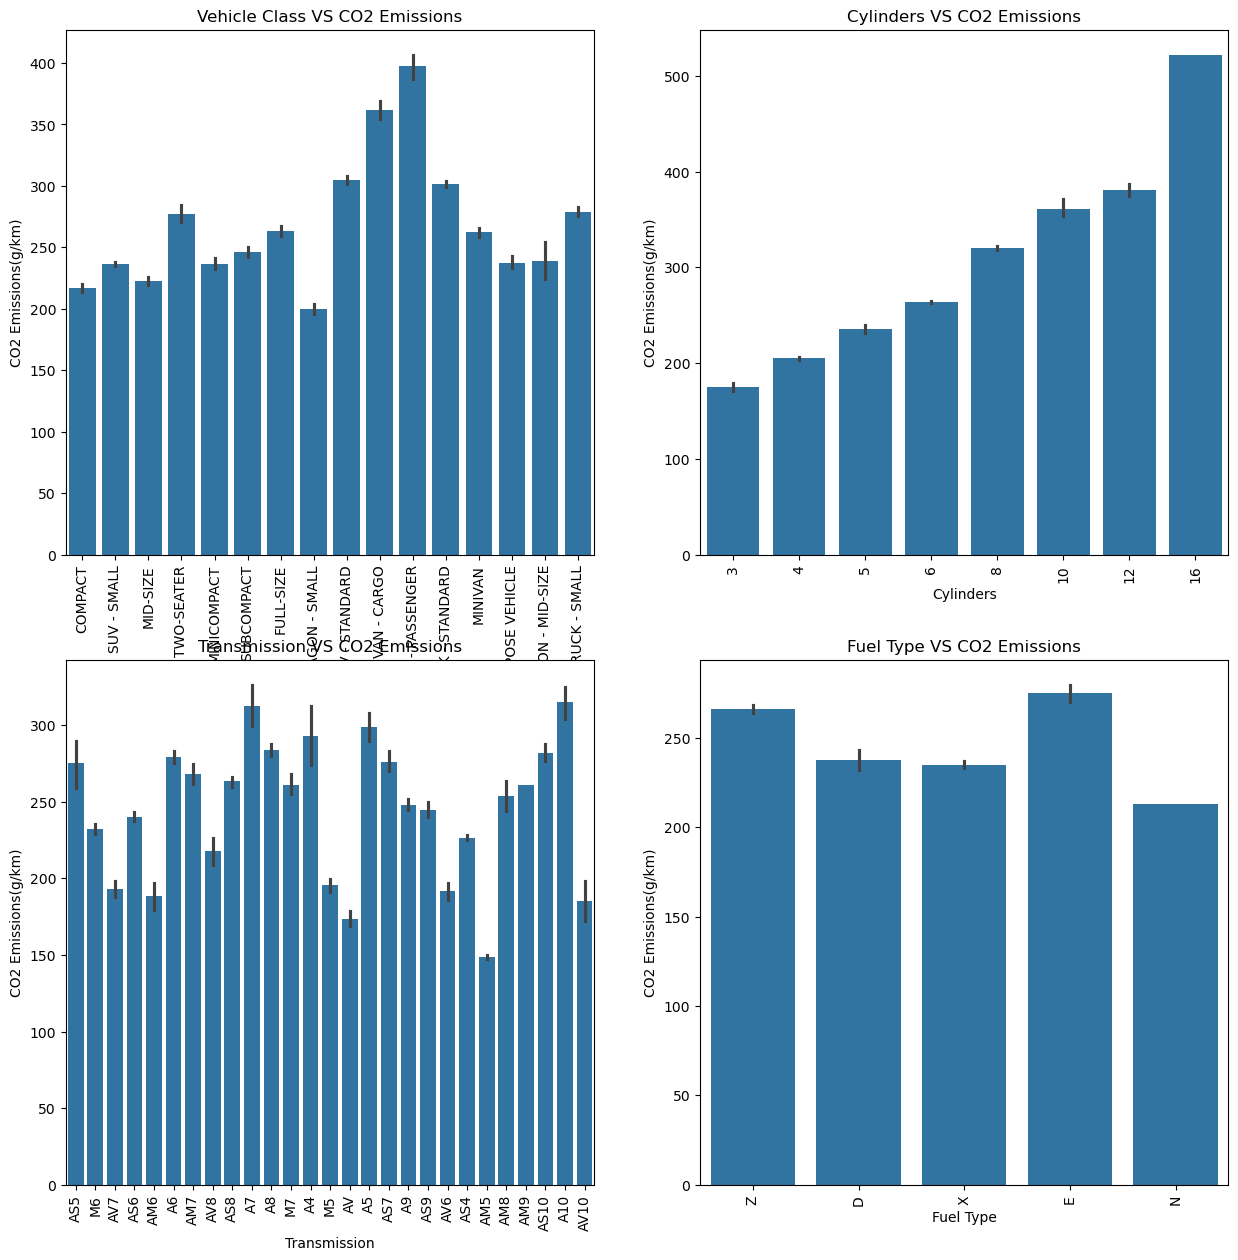

In [197]:
plt.figure(figsize=(15,15))

i= 1
for cat_col in categorical_cols:
    
    plt.subplot(2,2,i)
    sns.barplot(x=df[cat_col], y=df['CO2 Emissions(g/km)'])
    plt.xticks(rotation='vertical')
    plt.title(f'{cat_col} VS CO2 Emissions')
    i+=1

plt.show()

In [198]:
num_cols = ['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']

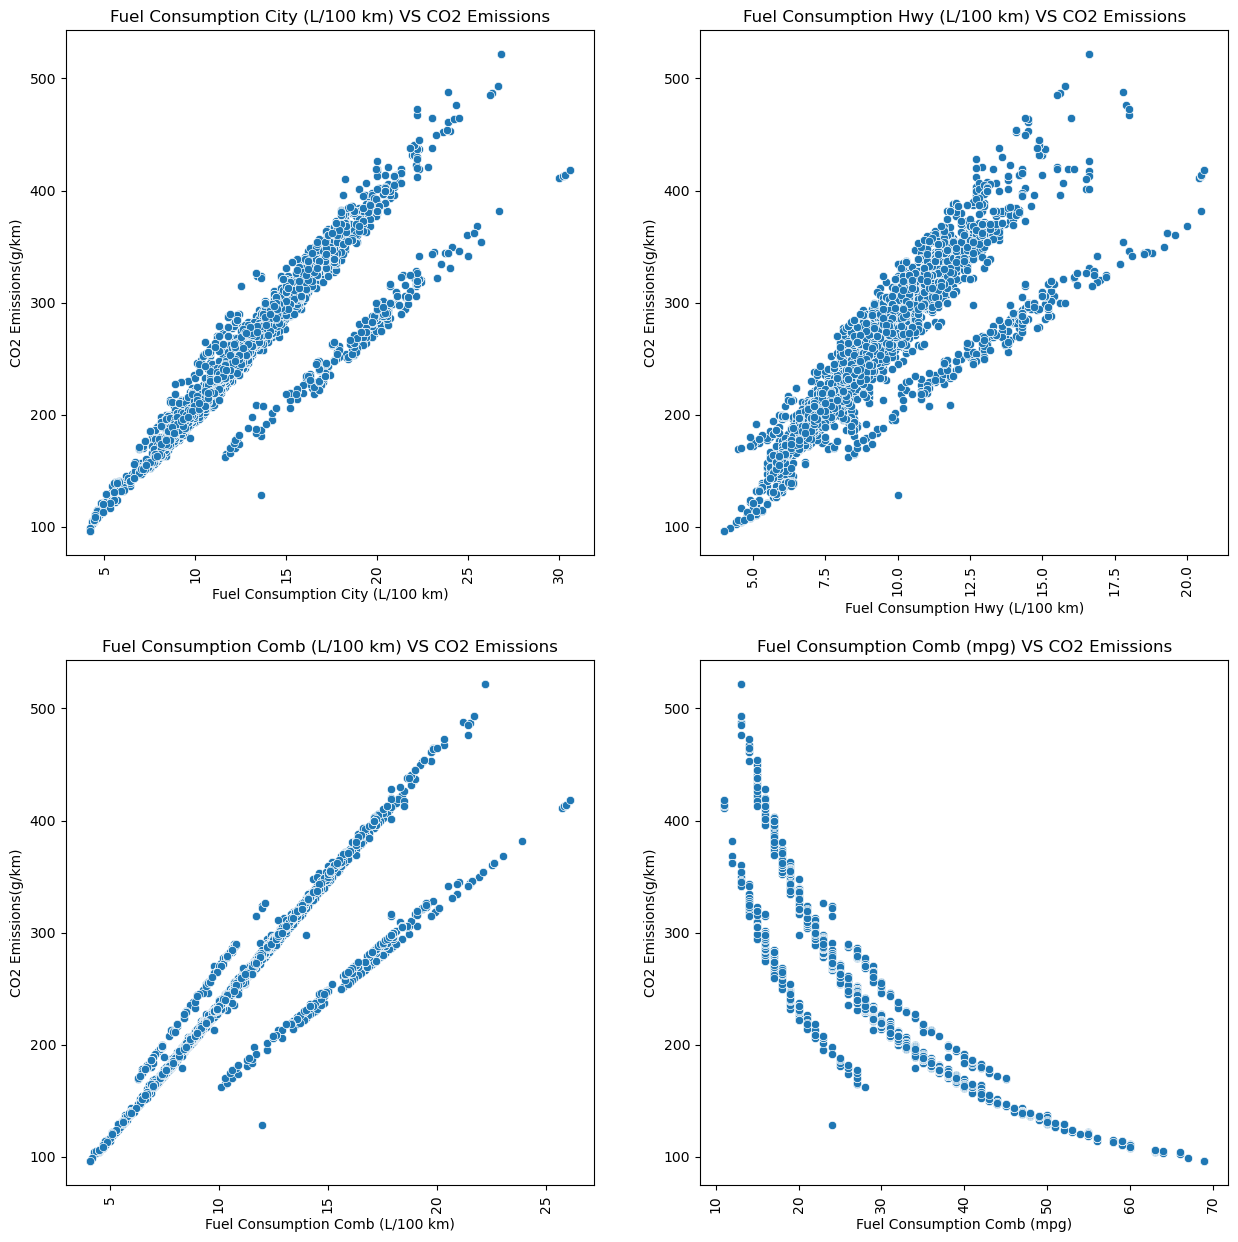

In [199]:
plt.figure(figsize=(15,15))

i= 1
for num_col in num_cols:
    
    plt.subplot(2,2,i)
    sns.scatterplot(x=df[num_col], y=df['CO2 Emissions(g/km)'])
    plt.xticks(rotation='vertical')
    plt.title(f'{num_col} VS CO2 Emissions')
    i+=1

plt.show()

## Scikit-Learn Implementation:

In [200]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [201]:
X= df.drop(columns=['CO2 Emissions(g/km)'])
y= df['CO2 Emissions(g/km)']

In [202]:
X_train, X_test, y_train, y_test= train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [203]:
numerical_cols= [col for col in X.columns if col not in categorical_cols]

In [204]:
preprocessor= ColumnTransformer(
    transformers=[
        ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('numerical', StandardScaler(), numerical_cols)
    ]
)

In [205]:
pipeline= Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]
)

In [206]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Vehicle Class', 'Cylinders',
                                                   'Transmission',
                                                   'Fuel Type']),
                                                 ('numerical', StandardScaler(),
                                                  ['Engine Size(L)',
                                                   'Fuel Consumption City '
                                                   '(L/100 km)',
                                                   'Fuel Consumption Hwy '
                                                   '(L/100 km)',
                                                   'Fuel Consumption Comb '
                                                   '(L/100 km)',
                                                   'Fuel Consumption Comb '
                                                   '(mpg)'])])),
                ('regressor', LinearRegression())])

In [207]:
y_pred= pipeline.predict(X_test)

In [208]:
print('R2 Score: ',r2_score(y_test, y_pred))

R2 Score:  0.9923150571725494


## Scratch Implementation:

In [209]:
class GD_regressor: 

    def __init__(self, learning_rate, epochs):
        
        self.intercept= None
        self.coef= None
        self.learning_rate= learning_rate
        self.epochs= epochs

    def fit(self, X_train, y_train):

        # Converts to dense numpy array if it is sparse
        if not isinstance(X_train, np.ndarray):
            X_train = X_train.toarray()
        else:
            X_train = np.array(X_train)

        if X_train.ndim == 1:
            X_train = X_train.reshape(-1, 1)
        
        y_train= np.array(y_train).flatten()
        
        self.intercept= 0
        self.coef= np.ones(X_train.shape[1])

        for i in range(self.epochs):
            y_pred= np.dot(X_train, self.coef) + self.intercept
            error= y_train - y_pred

            intercept_der= -2 * np.mean(error)
            self.intercept= self.intercept - (self.learning_rate * intercept_der)

            coef_der= -2 * np.dot(error, X_train)/X_train.shape[0]
            self.coef= self.coef - (self.learning_rate * coef_der)

    def predict(self, X_test):

        # Converts to dense numpy array if it is sparse
        if not isinstance(X_test, np.ndarray):
            X_test = X_test.toarray()
        else:
            X_test = np.array(X_test)

        if X_test.ndim == 1:
            X_test = X_test.reshape(-1, 1)
            
        return np.dot(X_test, self.coef) + self.intercept

In [210]:
pipeline= Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', GD_regressor(learning_rate=0.05, epochs=1000))
    ]
)

In [211]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Vehicle Class', 'Cylinders',
                                                   'Transmission',
                                                   'Fuel Type']),
                                                 ('numerical', StandardScaler(),
                                                  ['Engine Size(L)',
                                                   'Fuel Consumption City '
                                                   '(L/100 km)',
                                                   'Fuel Consumption Hwy '
                                                   '(L/100 km)',
                                                   'Fuel Consumption Comb '
                                                   '(L/100 km)',
                                                   'Fuel Consumption Comb '
                                                   '(mpg)'])])),
                ('regressor',
                 <__main__.GD_regressor object at 0x00000235E0D26F00>)])

In [212]:
y_pred1= pipeline.predict(X_test)

In [213]:
print('R2 Score: ',r2_score(y_test, y_pred1))

R2 Score:  0.9906324773107283
